In [681]:
props=list()
propDict={'Price':'','Location':'','Bedrooms':'','Area':''}
lastCopy=propDict.copy()
countDec=0
tempCount=[]
tempBath=[]
tempBath2=[]
#finList=[]

import requests
import re
from bs4 import BeautifulSoup

for i in range(0,3000,120):
    
    res=requests.get(f'https://sfbay.craigslist.org/search/apa?s={i}')
    soup=BeautifulSoup(res.text,'html.parser')
    finList=[]
    tempPrime=[]
    
    for count,tempStr in enumerate(soup.select('.result-info')):
        temp=[]
        temp=re.findall('[\d]+ft',str(tempStr))
        if temp!=[]:
            propDict.update({'Area':int(temp[0].replace('ft',''))})
        else:  
            propDict['Area']='None'
            
############################################################################## 

        tempPrime=[]
    
        matPatrn='[a-zA-Z]*\s*studio\s*[a-zA-Z]*'
        tempPrime=re.findall(matPatrn,str(tempStr).lower(),flags=re.IGNORECASE)
        
        removWordsPrime=['estudio','estudio de','from studio']
        
        if tempPrime!=[] and tempPrime not in removWordsPrime:
            propDict['Is Studio']='Yes'
        else:
            propDict['Is Studio']='NA'
            
############################################################################
        matPatrn='[a-zA-Z0-9]*\s*patio\s*[a-zA-Z0-9]*'
    
        takeWords={'private':'Has a Private patio','Private':'Has a Private patio',
                   'Large':'Has a Large patio','enclosed':'Has a Enclosed Patio',
                   'large':'Has a Large Patio',
                   'Spacious':'Has a Spacious patio'}
        
        tempPrime=[]
        tempPrime=re.findall(matPatrn,str(tempStr).lower(),flags=re.IGNORECASE)
        
        if tempPrime!=[]:
            flag=0
            for j in tempPrime:
                tempLst=[]
                tempLst=j.split(' ')
                for idx in tempLst:
                    idx=idx.replace(' ','')
                    for idx2 in takeWords.keys():
                        if idx2==idx:
                            propDict['Patio']=takeWords[idx2]
                            flag=1
                            break
                    break      
            if flag!=1:
                propDict['Patio']='Has Patio'
        else:
            propDict['Patio']='NA'
            
################################################################################ 

        initMatPatrn='WE ♥ PETS|pets are [a-z,A-Z]+|Pets are [a-z,A-Z]+|Pets [a-z,A-Z]+|pets [a-z,A-Z]+|Pet [a-z,A-Z]+|pet [a-z,A-Z]+'

        temp4=[]
        temp4=re.findall(initMatPatrn,str(tempStr))
        
        if temp4!=[]:
            if temp4[0]=='peting' or temp4[0]=='petaluma' :
                propDict['Pet friendly']='NA'
            else:
                if 'Pet Deposit,' not in temp4:
                    propDict['Pet friendly']='Yes' 
        else:
            propDict['Pet friendly']='NA'

################################################################################

        temp1=[]
    
        temp1=re.findall('"result-price">\S*(\$[\d]+)',str(tempStr))
        if temp1!=[]:
            temp2=temp1[0].strip('$')
            propDict.update({'Price':int(temp2)})
        else:  
            propDict['Price']='None'
            
################################################################################## 

        temp2=[]
        temp2=re.findall('<span class="result-hood">([\a-z]+)</span>\n<span class="result-tags">',str(tempStr))
        if temp2!=[]:
            temp3=temp2[0].strip('()')
            propDict.update({'Location':temp3})
        else:  
            propDict['Location']='None'
            
##################################################################################  

        temp3=[]
        matPatt='[\d]br |[\d]BR |[\d]Bedroom |[\d]bedroom |[\d] BR|[\d] br|[\d] bedroom|[\d] Bedroom'
        temp3=re.findall(matPatt,str(tempStr))
        
        if temp3!=[]:
            temp4=temp3[0].replace('br','').replace(' ','')
            if len(temp4)>2 and len(temp4)<8:
                temp4=temp3[0].replace('BR','').replace(' ','')
            if len(temp4)>=8:
                temp4=temp3[0].replace('bedroom','').replace(' ','')
            if len(temp4)>=8:
                temp4=temp3[0].replace('Bedroom','').replace(' ','')
            propDict.update({'Bedrooms':int(temp4)})
            tempCount.append(int(temp4))
        else:  
            propDict['Bedrooms']='None'
            
###################################################################################            
            
        temp4=[] 
        initMatPat=\
        '[\d] Baths|[\d] baths|[\d]Bath|[\d] BA|[\d] ba|[\d]BA|[\d]ba|[\d] baths|[\d]baths|[\d]Baths|[\d] bath|[\d]] Bath|[\d]bath|[\d]Bath|[\d]-ba|[\d]-BA|\d\.\dBath|\d\.\d Bath|\d\.\dbath|\d\.\d bath|\d\.\d BA|\d\.\d ba|\d\.\d-BA|\d\.\d-ba|\d\.\dBA|\d\.\dba'
        temp4=re.findall(initMatPat,str(tempStr))
    
        if temp4!=[]:
            temp5=temp4[0]
            matPatrn='Baths|baths|Bath|bath|ba|BA'
            tempPrime=temp5.replace(' ','').replace('-','')
            tempLst=re.sub(matPatrn,'',tempPrime)
            if float(tempLst)!=5.0:
                tempBath.append(float(tempLst))
                propDict.update({'Baths':float(tempLst)})   
        else:
            propDict['Baths']='None'
            
######################################################################################           
            
        initMatPatrn='[a-zA-z0-9]*\s*kitchen\s*[a-zA-Z0-9]*|\W*\s*kitchen\s*\W*|[a-zA-z0-9]*\-kitchen\-[a-zA-Z0-9]*|[a-zA-z0-9]*\W*kitchen\W*[a-zA-Z0-9]*'
        tempkitchen=[]
        removWords=\
        ['and','your','necessities','in','mountain','with','dryer','available','s','w','ette','studiofull', 'd','high','this','milpitas','s','in','','that','wow','Bath','dryer','WITH','','sunnyhuge','|storage|has','jacuzzi','AVAILABLE•','amp; (ingleside','S','space• has','Concept','end','patio:: has',' (ingleside','• Bright living space • Kitchen has it all']
        matPatrn='\|\+|/|\-|\d{2}|1br'  
        matPatrn2='Kitchen|Kitchens|kitchen|kitchens'
        tempCounter=[]
        temp=[]
        temp=re.findall(initMatPatrn,str(tempStr),flags=re.IGNORECASE)
       
        
        if temp!=[]:
            tempCounter.append(count)
            temp1=''
            temp2=''
            temp3=''
            temp1=re.sub(matPatrn,' ',temp[0])
            temp2=re.sub(matPatrn2,'####',temp1,flags=re.IGNORECASE)
            temp3=re.split('####',temp2)
            tempLst=[]
            
            for j in temp3:
                jPrime=''
                jPrime=j.replace(' ','').replace(',','')
                if jPrime not in removWords:
                    tempLst.append(jPrime) 
                    
            finList=[] 
            if 'bbqs'in tempLst or 'chefs' in tempLst or 'stainless' in tempLst:
                finList.append(tempLst)
            else:
                if len(tempLst)!=0:
                    finList.append(' '.join(tempLst))
                else:
                    finList.append('NA')         
            propDict['Kitchen attraction']=finList
        else:
            propDict['Kitchen attraction']='NA'
            
            
##########################################################################################

        finList=[]
    
        #Taking care of multiple same ads
        if lastCopy!=propDict:
            props.append(propDict.copy())
            lastCopy=propDict.copy()
        else:
            countDec+=1
            continue
    
    
               


In [682]:
res=requests.get(f'https://sfbay.craigslist.org/search/apa?s={1320}')
soup=BeautifulSoup(res.text,'html.parser')

tempStr=soup.select('.result-info')   
print(tempStr[89])

<p class="result-info">
<span class="icon icon-star" role="button">
<span class="screen-reader-text">favorite this post</span>
</span>
<time class="result-date" datetime="2020-06-04 17:53" title="Thu 04 Jun 05:53:21 PM">Jun  4</time>
<a class="result-title hdrlnk" data-id="7136055681" href="https://sfbay.craigslist.org/eby/apa/d/berkeley-2-bed-1-bath-upper-unit-in/7136055681.html">2 bed 1 Bath Upper Unit in Berkeley| 1736 Addison Street</a>
<span class="result-meta">
<span class="result-price">$3500</span>
<span class="housing">
                    2br -
                </span>
<span class="result-hood"> (berkeley)</span>
<span class="result-tags">
<span class="pictag">pic</span>
</span>
<span class="banish icon icon-trash" role="button">
<span class="screen-reader-text">hide this posting</span>
</span>
<span aria-hidden="true" class="unbanish icon icon-trash red" role="button"></span>
<a class="restore-link" href="#">
<span class="restore-narrow-text">restore</span>
<span class="resto

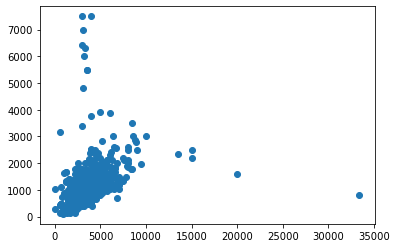

In [683]:
tempPrice=[]
tempArea=[]
for i in props:
    
    if i['Price']!='None' and i['Area']!='None' and i['Area']<8000:
        tempPrice.append(i['Price'])
        tempArea.append(i['Area'])
    #print(tempArea)
    
    
import matplotlib.pyplot as plt
plt.scatter(tempPrice,tempArea)
plt.show()

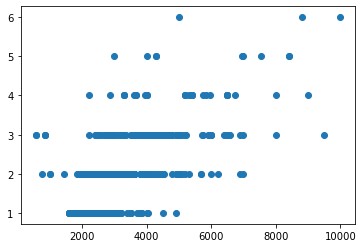

In [684]:
tempPrice=[]
tempBedrooms=[]

for i in props:
     if i['Price']!='None' and i['Bedrooms']!='None' and i['Baths']!='None' and i['Bedrooms']<7:
        tempPrice.append(i['Price'])
        tempBedrooms.append(i['Bedrooms'])
        
import matplotlib.pyplot as plt
plt.scatter(tempPrice,tempBedrooms)
plt.show()

{'Studio': 460667, '1 Bed': 2808630, '2 Bed': 3009266, '3 Bed': 1398114, '4 Bed': 341392}
{'Studio': 231, '1 Bed': 1157, '2 Bed': 964, '3 Bed': 347, '4 Bed': 68}


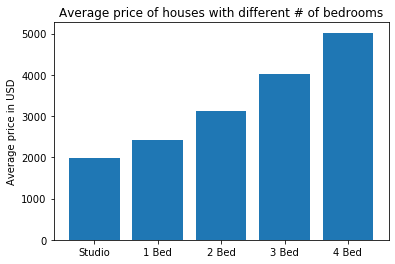

In [753]:
#might have to fork this later if the distn. over #beds change
#drastically.Might have to use brute force conditioning instead 
#of the dict. approach. 

bedDict={'Studio':0,'1 Bed':0,'2 Bed':0,'3 Bed':0,'4 Bed':0}
bedCount={'Studio':0,'1 Bed':0,'2 Bed':0,'3 Bed':0,'4 Bed':0}
matDict={0:'Studio',1:'1 Bed',2:'2 Bed',3:'3 Bed',4:'4 Bed'}

for i in props:
    if i['Bedrooms']!='None' and i['Bedrooms']<=4:
        bedDict[matDict[i['Bedrooms']]]+=i['Price']
        bedCount[matDict[i['Bedrooms']]]+=1
    
    if i['Is Studio']=='Yes':
        bedDict['Studio']+=i['Price']
        bedCount['Studio']+=1
    
print(bedDict)
print(bedCount)

tempPrice=list(bedDict.values())
tempBed=list(bedCount.values())
tempCount=list(bedCount.keys())

for i in range(len(tempBed)):
    if tempBed[i]==0:
        tempBed.remove(tempBed[i])
        tempPrice.remove(tempPrice[i]) 
        tempCount.remove(temp2[i])

temp=list(map(lambda tempPrice,tempCount:tempPrice/tempCount,tempPrice,tempBed))

plt.figure()
plt.bar(tempCount,temp)
plt.title('Average price of houses with different # of bedrooms')
plt.ylabel('Average price in USD')
plt.show()

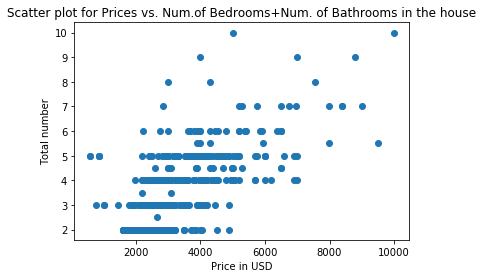

In [705]:
tempPrice=[]
tempBedrooms=[]
tempBathsBeds=[]

for i in props:
    if i['Price']!='None' and i['Bedrooms']!='None' and i['Baths']!='None' and i['Bedrooms']<7:
        tempPrice.append(i['Price'])
        tempBathsBeds.append(i['Baths']+i['Bedrooms'])
    
plt.scatter(tempPrice,tempBathsBeds)
plt.xlabel('Price in USD')
plt.ylabel('Total number')
plt.title('Scatter plot for Prices vs. Num.of Bedrooms+Num. of Bathrooms in the house')
plt.show()

In [706]:
tempPrice=[]
tempPriceWdKitchen=[]
tempPriceWdKitchenPet=[]

for i in props:
    tempPrice.append(i['Price'])
    if i['Kitchen attraction']!='NA':
        tempPriceWdKitchen.append(i['Price'])
    if i['Kitchen attraction']!='NA' and i['Pet friendly']!='NA':
        tempPriceWdKitchenPet.append(i['Price'])


In [707]:
import numpy as np

print(f'Average price of houses {np.mean(tempPrice)}')
print(f'Average price for a house with some kitchen attraction {np.mean(tempPriceWdKitchen)}')
print(f'Average price with some kitchen attraction and a pet friendly house {np.mean(tempPriceWdKitchenPet)}')

Average price of houses 2889.87690226581
Average price for a house with some kitchen attraction 2888.575221238938
Average price with some kitchen attraction and a pet friendly house 3318.3333333333335


In [708]:
tempKitchen=[]

kitchenType={'Modern':0,'Upgraded':0,'LUX':0,'Deluxe':0,'Granite Island':0,'Maker Island':0}
countType={'Modern':0,'Upgraded':0,'LUX':0,'Deluxe':0,'Granite Island':0,'Maker Island':0}

matchDict={'None':'Studio',1:'1 Bed',2:'2 Bed',3:'3 Bed',4:'4 Bed'}
bedDictModern={'Studio':0,'1 Bed':0,'2 Bed':0,'3 Bed':0,'4 Bed':0}

bedDictUpgraded=bedDictModern.copy()
bedDictLUX=bedDictModern.copy()
bedDictDeluxe=bedDictLUX.copy()
bedDictGran=bedDictLUX.copy()
bedDictIsl=bedDictLUX.copy()

tempKitchenType={'Modern':bedDict,'Upgraded':bedDict,'LUX':bedDict,'Deluxe':bedDict,
                 'Granite Island':bedDict,'Maker Island':bedDict}

for i in props:
    
    temp=i['Bedrooms']
    
    if i['Kitchen attraction'][0]=='Modern' or i['Kitchen attraction'][0]=='modern':
        kitchenType['Modern']+=i['Price']
        countType['Modern']+=1
        bedDictModern[matchDict[temp]]+=1
        tempKitchenType['Modern']=bedDictModern
        
    elif i['Kitchen attraction'][0]=='Upgraded' or i['Kitchen attraction'][0]=='upgraded':
        kitchenType['Upgraded']+=i['Price']
        countType['Upgraded']+=1
        bedDictUpgraded[matchDict[temp]]+=1
        tempKitchenType['Upgraded']=bedDictUpgraded
        
    elif i['Kitchen attraction'][0]=='Maker Island':
        kitchenType['Maker Island']+=i['Price']
        countType['Maker Island']+=1
        bedDictIsl[matchDict[temp]]+=1
        tempKitchenType['Maker Island']=bedDictIsl
        
    elif i['Kitchen attraction'][0]=='Deluxe' or i['Kitchen attraction'][0]=='deluxe':
        kitchenType['Deluxe']+=i['Price']
        countType['Deluxe']+=1
        bedDictDeluxe[matchDict[temp]]+=1
        tempKitchenType['Deluxe']=bedDictDeluxe
        
    elif i['Kitchen attraction'][0]=='Granite Island' or i['Kitchen attraction'][0]=='granite island':
        kitchenType['Granite Island']+=i['Price']
        countType['Granite Island']+=1
        bedDictGran[matchDict[temp]]+=1
        tempKitchenType['Granite Island']=bedDictGran
        
    elif i['Kitchen attraction'][0]=='LUX' or i['Kitchen attraction'][0]=='LUX':
        kitchenType['LUX']+=i['Price'] 
        countType['LUX']+=1
        bedDictLUX[matchDict[temp]]+=1
        tempKitchenType['LUX']=bedDictLUX
    

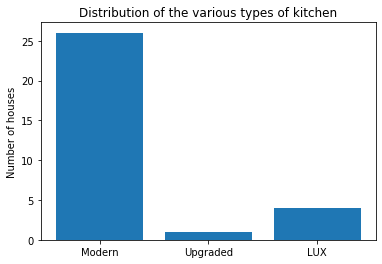

Text(0.5, 1.0, 'Distribution of average price of houses with different types of kitchens')

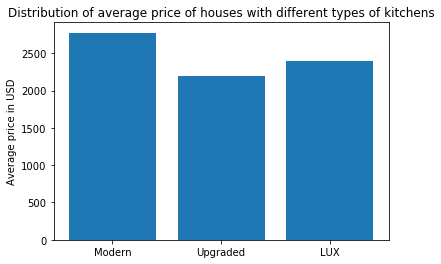

In [737]:
#for the total price of every kitchen
tempKitchen=list(kitchenType.values())

#for the count of differnet types of kitchen
tempCount=list((countType.values()))

#for the different types of kitchen
tempNames=list(kitchenType.keys())

#For removing the zero-count ones
#IF the distrn. of ad changes drastically
numTimes=tempCount.count(0)
for i in range(numTimes):
    idx=tempCount.index(0)
    tempCount.pop(idx)
    tempKitchen.pop(idx)
    tempNames.pop(idx)


temp=map(lambda tempKitchen,tempCount:tempKitchen/tempCount,tempKitchen,tempCount)

#Frequency of the differnet types:
plt.figure()
plt.bar(tempNames,tempCount)
plt.title('Distribution of the various types of kitchen')
plt.ylabel('Number of houses')
plt.show()

#Distribution of average price:
plt.figure()
plt.bar(tempNames,list(temp))
plt.ylabel('Average price in USD')
plt.title('Distribution of average price of houses with different types of kitchens')





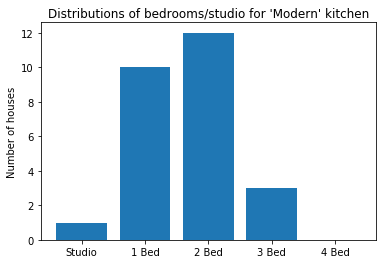

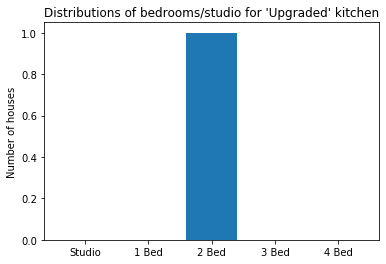

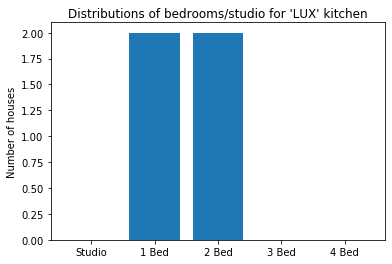

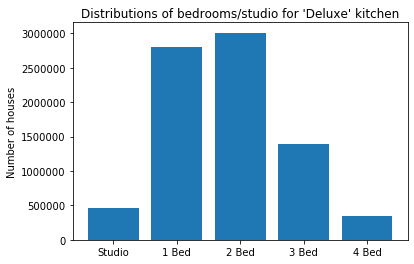

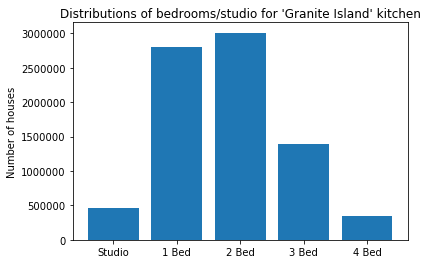

In [738]:
plt.figure()
keys=tempKitchenType['Modern'].keys()
vals=tempKitchenType['Modern'].values()
plt.bar(keys,vals)
plt.title('Distributions of bedrooms/studio for \'Modern\' kitchen')
plt.ylabel('Number of houses')
plt.show()

plt.figure()
keys=tempKitchenType['Upgraded'].keys()
vals=tempKitchenType['Upgraded'].values()
plt.bar(keys,vals)
plt.title('Distributions of bedrooms/studio for \'Upgraded\' kitchen')
plt.ylabel('Number of houses')
plt.show()

plt.figure()
keys=tempKitchenType['LUX'].keys()
vals=tempKitchenType['LUX'].values()
plt.bar(keys,vals)
plt.title('Distributions of bedrooms/studio for \'LUX\' kitchen')
plt.ylabel('Number of houses')
plt.show()

plt.figure()
keys=tempKitchenType['Deluxe'].keys()
vals=tempKitchenType['Deluxe'].values()
plt.bar(keys,vals)
plt.title('Distributions of bedrooms/studio for \'Deluxe\' kitchen')
plt.ylabel('Number of houses')
plt.show()

plt.figure()
keys=tempKitchenType['Granite Island'].keys()
vals=tempKitchenType['Granite Island'].values()
plt.bar(keys,vals)
plt.title('Distributions of bedrooms/studio for \'Granite Island\' kitchen')
plt.ylabel('Number of houses')
plt.show()

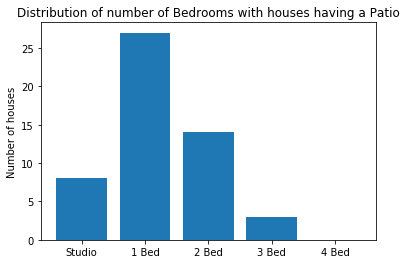

In [739]:
#Relationship between studio--kitchen attraction: 
#None are studio apartments hence #bedrooms are 'none'
#Might have to fork this later if the #beds in the ads change
#drastically.
#Brute force conditioning might turn out to be a better option later. 

matDict={'Has Studio':'Studio',1:'1 Bed',2:'2 Bed',3:'3 Bed',4:'4 Bed'}
bedDict={'Studio':0,'1 Bed':0,'2 Bed':0,'3 Bed':0,'4 Bed':0}

for i in props:
    if i['Patio']!='NA':
        if i['Bedrooms']=='None':
            bedDict['Studio']+=1
        else:
            temp=i['Bedrooms']
            bedDict[matDict[temp]]+=1
            
        
keys=list(bedDict.keys())
vals=list(bedDict.values())

plt.figure()
plt.bar(keys,vals)
plt.title('Distribution of number of Bedrooms with houses having a Patio')
plt.ylabel('Number of houses')
plt.show()




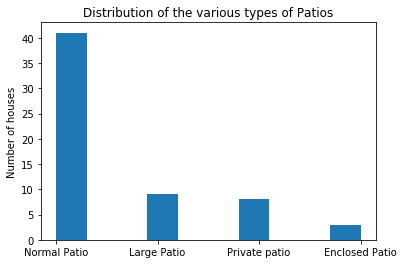

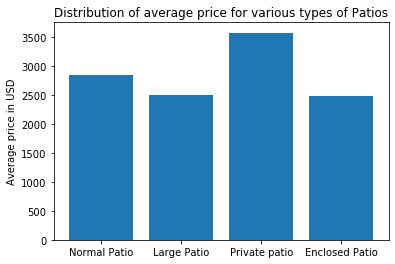

In [501]:
#All about Patios
#Fork this cell if it starts erroring because of the split
#Use separate conditions for the different names instead the
#current approach.
#Check after few days.

temp=[]
tempLstPrime=[]
tempNormal=[]
tempLarge=[]
tempPrivate=[]
tempEnclosed=[]
matPatrn='\sa\s'

matchDict={'None':'Studio',1:'1 Bed',2:'2 Bed',3:'3 Bed',4:'4 Bed'}
matchDict2={'Has Patio':tempNormal,'Large Patio':tempLarge,'Private patio':tempPrivate,'Enclosed Patio':tempEnclosed}

for i in props:
    if i['Patio']!='NA':
        temp=i['Patio']
        tempPrime=i['Bedrooms']
        bedDict={'Studio':0,'1 Bed':0,'2 Bed':0,'3 Bed':0,'4 Bed':0}
        
        if temp=='Has Patio':
            bedDict[matchDict[tempPrime]]+=1
            matchDict2[temp].append(bedDict)
        else:  
            tempLst=re.split(matPatrn,temp)
            bedDict[matchDict[tempPrime]]+=1
            matchDict2[tempLst[1]].append(bedDict)
            
            
temp=[]
tempCounts=list(countDict.values())
tempPrice=list(priceDict.values())
tempNames=list(priceDict.keys())

[temp.append(i) for i in range(len(tempCounts)) if tempCounts[i]==0]

for i in temp: 
    tempCounts.remove(tempCounts[i])
    tempPrice.remove(tempPrice[i])
    tempNames.remove(tempNames[i])
    
tempPrime=list(map(lambda tempCounts,tempPrice: tempPrice/tempCounts,tempCounts,tempPrice))


#Distribution of the frequency of occurences
plt.hist(tempPatio)
plt.title('Distribution of the various types of Patios')
plt.ylabel('Number of houses')
plt.show()

#Distribution of the average price:
plt.bar(tempNames,tempPrime)
plt.title('Distribution of average price for various types of Patios')
plt.ylabel('Average price in USD')
plt.show()





    


In [740]:
tempBedsNormal={'Studio':0,'1 Bed':0,'2 Bed':0,'3 Bed':0,'4 Bed':0}

tempBedsLarge=tempBedsNormal.copy()
tempBedsPrivate=tempBedsNormal.copy()
tempBedsEnclosed=tempBedsNormal.copy()

for key,vals in matchDict2.items():
    
    if key=='Has Patio':
        for i in vals:
            for tempKeys,tempVals in i.items():
                if tempVals==1:
                    tempBedsNormal[tempKeys]+=1
    if key=='Large Patio':
        for i in vals:
            for tempKeys,tempVals in i.items():
                if tempVals==1:
                    tempBedsLarge[tempKeys]+=1
    if key=='Private patio':
        for i in vals:
            for tempKeys,tempVals in i.items():
                if tempVals==1:
                    tempBedsPrivate[tempKeys]+=1
    if key=='Enclosed Patio':
        for i in vals:
            for tempKeys,tempVals in i.items():
                if tempVals==1:
                    tempBedsEnclosed[tempKeys]+=1
                    
    
    

{'Studio': 1, '1 Bed': 1, '2 Bed': 1, '3 Bed': 0, '4 Bed': 0}
{'Studio': 1, '1 Bed': 1, '2 Bed': 5, '3 Bed': 1, '4 Bed': 0}
{'Studio': 0, '1 Bed': 6, '2 Bed': 3, '3 Bed': 0, '4 Bed': 0}
{'Studio': 9, '1 Bed': 16, '2 Bed': 13, '3 Bed': 3, '4 Bed': 0}


<BarContainer object of 5 artists>

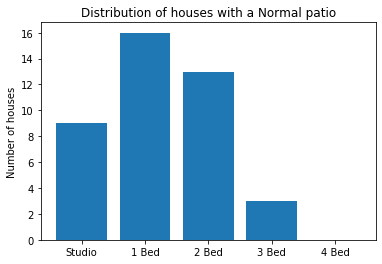

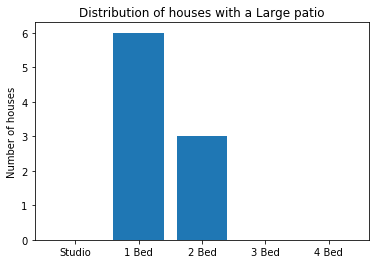

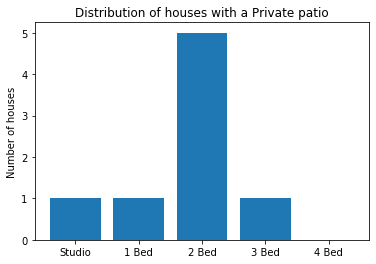

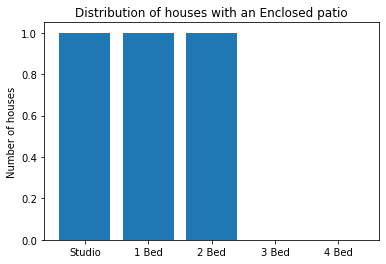

In [741]:
print(tempBedsEnclosed)
print(tempBedsPrivate)
print(tempBedsLarge)
print(tempBedsNormal)


keys,vals=tempBedsNormal.keys(),tempBedsNormal.values()
plt.figure()
plt.title('Distribution of houses with a Normal patio')
plt.ylabel('Number of houses')
plt.bar(keys,vals)

keys,vals=tempBedsLarge.keys(),tempBedsLarge.values()
plt.figure()
plt.title('Distribution of houses with a Large patio')
plt.ylabel('Number of houses')
plt.bar(keys,vals)

keys,vals=tempBedsPrivate.keys(),tempBedsPrivate.values()
plt.figure()
plt.title('Distribution of houses with a Private patio')
plt.ylabel('Number of houses')
plt.bar(keys,vals)

keys,vals=tempBedsEnclosed.keys(),tempBedsEnclosed.values()
plt.figure()
plt.title('Distribution of houses with an Enclosed patio')
plt.ylabel('Number of houses')
plt.bar(keys,vals)

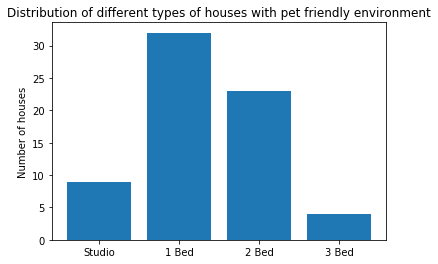

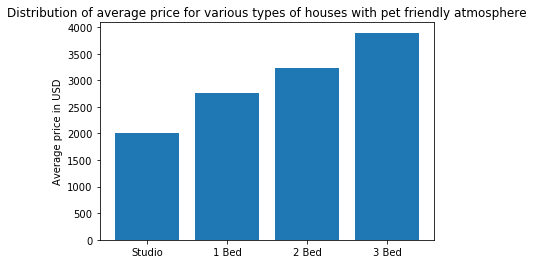

In [754]:
#Pet friendliness...
priceDict={'Studio':0,'1 Bed':0,'2 Bed':0,'3 Bed':0,'4 Bed':0,'5 Bed':0}
matDict={'None':'Studio',1:'1 Bed',2:'2 Bed',3:'3 Bed',4:'4 Bed',5:'5 Bed'}
countDict={'Studio':0,'1 Bed':0,'2 Bed':0,'3 Bed':0,'4 Bed':0,'5 Bed':0}


for i in props:
    temp=i['Bedrooms']
    tempPrime=i['Price']
    
    if i['Pet friendly']!='NA':
        
        priceDict[matDict[temp]]+=i['Price']
        countDict[matDict[temp]]+=1
        
        
temp=[]
tempPrime=[]
tempCounts=list(countDict.values())
tempPrice=list(priceDict.values())
tempNames=list(priceDict.keys())

#For removing the zero-count ones
#IF the distrn. of ad changes drastically
numTimes=tempCounts.count(0)
for i in range(numTimes):
    idx=tempCounts.index(0)
    tempCounts.pop(idx)
    tempPrice.pop(idx)
    tempNames.pop(idx)

    
tempPrime=list(map(lambda tempCounts,tempPrice: tempPrice/tempCounts,tempCounts,tempPrice))

#Distribution of the frequency of occurences
plt.bar(tempNames,tempCounts)
plt.title('Distribution of different types of houses with pet friendly environment')
plt.ylabel('Number of houses')
plt.show()

#Distribution of the average price:
plt.bar(tempNames,tempPrime)
plt.title('Distribution of average price for various types of houses with pet friendly atmosphere')
plt.ylabel('Average price in USD')
plt.show()

In [818]:
southBay=['Campbell','Cupertino','Gilroy','Los Altos','Los Gatos','Milpitas','San Jose',
          'Santa Clara','Sunnyvale','santa cruz','San Jose CA','morgan hill']

peninsula=['Belmont','Burlingame','Daly City','East Palo Alto','Foster City','Half Moon Bay','Los Altos','Menlo Park','Millbrae',
           'Mountain View','Pacifica','Palo Alto','Redwood City','San Bruno','San Carlos','San Mateo','South San Francisco',
           'Northern Sunnyvale','2020 Latham Street','1990 Latham Street','120 W. 3rd Street San Mateo','San Jose South']

eastBay=['Alameda','Albany','Antioch','Berkeley','Concord','Dublin','Emeryville','Fremont','Hayward',
         'Livermore','Martinez','Newark','Oakland','Orinda','Piedmont','Pleasanton','Pleasant Hill','Richmond','San Leandro',
         'San Ramon','Union City','Walnut Creek','oakland lake merritt', 'oakland rockridge','oakland hills',
         'NORTH OAKLAND  TEMESCAL','DOWNTOWN oakland','oakland piedmont','hercules','pittsburg','Jingletown']

northBay=['Belvedere','Benicia','Bolinas','Corte Madera','Fairfax','Fairfield','Forestville','Guerneville','Graton','Healdsburg',
          'Larkspur','Mill Valley','Napa','Novato','Petaluma','Ross','San Anselmo','San Rafael','Santa Rosa','Sausalito','Sebastopol',
          'Stinson Beach','Tiburon','Vacaville','Vallejo','Windsor','napa county','rohnert pk','sonoma']

sanFransisco=['South SanFransisco','North SanFransisco','East SanFransisco','West SanFransisco',
              'san francisco','SF BAY AREA','SOMA','lower nob hill','SOMA',
              'noe valley','mission district','Mission Dolores','russian hill','pacific heights','marina','nob hill','inner richmond']

priceDict={'South Bay':0,'Peninsula':0,'East Bay':0,'North Bay':0,'San Fransisco':0}
countDict=priceDict.copy()

matDict={'None':'Studio',1:'1 Bed',2:'2 Bed',3:'3 Bed',4:'4 Bed',5:'4 Bed',6:'6 Bed'}
priceDictEast={'Studio':0,'1 Bed':0,'2 Bed':0,'3 Bed':0,'4 Bed':0,'5 Bed':0,'6 Bed':0}
countDictEast={'Studio':0,'1 Bed':0,'2 Bed':0,'3 Bed':0,'4 Bed':0,'5 Bed':0,'6 Bed':0}

priceDictNorth=priceDictEast.copy()
countDictNorth=countDictEast.copy()
priceDictPenin=priceDictEast.copy()
countDictPenin=countDictEast.copy()
priceDictSouth=priceDictEast.copy()
countDictSouth=countDictEast.copy()
priceDictSan=priceDictEast.copy()
countDictSan=countDictEast.copy()


unknownCat=[]
matPatrn='/|\,|_'

for i in props:
    
    temp1=i['Location']
    tempBed=i['Bedrooms']
    
    if temp1!='None':
        temp1=re.sub('\(','',temp1)
        tempPrime=re.split(matPatrn,temp1)
        temp=tempPrime[0]
        temp=re.split(' ',temp)
        
        if temp[0]=='':
            temp.pop(0)
        if temp[len(temp)-1]=='':
            temp.pop(len(temp)-1)
            
        temp1=' '.join(temp)    
        temp1Prime=re.split(' ',temp1)
        
        if temp1Prime[len(temp1Prime)-1]=='east':
            temp1Prime.pop(len(temp1Prime)-1)
        if temp1Prime[len(temp1Prime)-1]=='west':
            temp1Prime.pop(len(temp1Prime)-1)
        if temp1Prime[len(temp1Prime)-1]=='north':
            temp1Prime.pop(len(temp1Prime)-1)
        if temp1Prime[len(temp1Prime)-1]=='south':
            temp1Prime.pop(len(temp1Prime)-1)
        if temp1Prime[len(temp1Prime)-1]=='downtown':
            temp1Prime.pop(len(temp1Prime)-1)
    
        temp=''
        temp=' '.join(temp1Prime)
        temp2=i['Price']
        
        tempSouth=list(map(lambda temp3:temp3.replace(' ',''), list(map(lambda temp4:temp4.lower(),southBay))))
        tempEast=list(map(lambda temp3:temp3.replace(' ',''), list(map(lambda temp4:temp4.lower(),eastBay))))
        tempNorth=list(map(lambda temp3:temp3.replace(' ',''), list(map(lambda temp4:temp4.lower(),northBay))))
        tempPeninusla=list(map(lambda temp3:temp3.replace(' ',''),list(map(lambda temp4:temp4.lower(),peninsula))))
        tempSan=list(map(lambda temp3:temp3.replace(' ',''),list(map(lambda temp4:temp4.lower(),sanFransisco))))
        
        if temp.lower().replace(' ','') in tempSouth:
            priceDict['South Bay']+=temp2
            countDict['South Bay']+=1
            if tempBed=='None' or tempBed<=6:
                priceDictSouth[matDict[tempBed]]+=temp2
                countDictSouth[matDict[tempBed]]+=1
        elif temp.lower().replace(' ','') in tempEast:
            priceDict['East Bay']+=temp2
            countDict['East Bay']+=1
            if tempBed=='None' or tempBed<=6:
                priceDictEast[matDict[tempBed]]+=temp2
                countDictEast[matDict[tempBed]]+=1
        elif temp.lower().replace(' ','') in tempNorth:
            priceDict['North Bay']+=temp2
            countDict['North Bay']+=1
            if tempBed=='None' or tempBed<=6:
                priceDictNorth[matDict[tempBed]]+=temp2
                countDictNorth[matDict[tempBed]]+=1
        elif temp.lower().replace(' ','') in tempPeninusla:
            priceDict['Peninsula']+=temp2
            countDict['Peninsula']+=1
            if tempBed=='None' or tempBed<=6:
                priceDictPenin[matDict[tempBed]]+=temp2
                countDictPenin[matDict[tempBed]]+=1
        elif temp.lower().replace(' ','') in tempSan:
            priceDict['San Fransisco']+=temp2
            countDict['San Fransisco']+=1
            if tempBed=='None' or tempBed<=6:
                priceDictSan[matDict[tempBed]]+=temp2
                countDictSan[matDict[tempBed]]+=1
        else:
            unknownCat.append(temp)
            
        
            

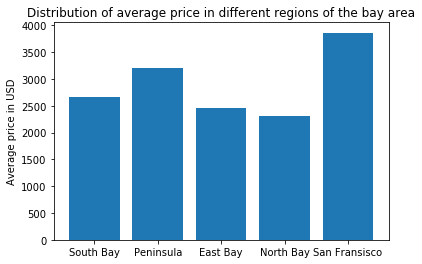

In [811]:
tempLst=list(map(lambda tempCount,tempPrice: tempPrice/tempCount, countDict.values(),priceDict.values()))
tempNames=list(countDict.keys())

plt.figure()
plt.bar(tempNames,tempLst)
plt.ylabel('Average price in USD')
plt.title('Distribution of average price in different regions of the bay area')
plt.show()

In [832]:
#For the different regions: Distribution of average housing 
#for different number of bedrooms in the different regions of the bay area. 

tempNames,tempPrice=list(priceDictSan.keys()),list(priceDictSan.values())
tempCount=list(countDictSan.values())

titleNamList=['South Bay','East Bay','North Bay','Peninsula','SFO']

tempNames=[list(priceDictSouth.keys()),list(priceDictEast.keys()),list(priceDictNorth.keys()),
           list(priceDictPenin.keys()),list(priceDictSan.keys())]

tempPrice=[list(priceDictSouth.values()),list(priceDictEast.values()),list(priceDictNorth.values()),
           list(priceDictPenin.values()),list(priceDictSan.values())]

tempCount=[list(countDictSouth.values()),list(countDictEast.values()),list(countDictNorth.values()),
           list(countDictPenin.values()),list(countDictSan.values())]




def barPlots(titleNamList,tempNames,tempPrice,tempCount):

    #To avoid divide by zero error 
    #incase the distn. of ad changes drastically
    #and there are no #Bedrooms present...
    numTimes=tempCount.count(0)
    for i in range(numTimes):
        idx=tempCount.index(0)
        tempCount.pop(idx)
        tempPrice.pop(idx)
        tempNames.pop(idx)

    tempLst=list(map(lambda tempCount,tempPrice: tempPrice/tempCount, tempCount,tempPrice))

    plt.figure()
    plt.bar(tempNames,tempLst)
    plt.title(f'Distribution of differnet number of bedrooms in {titleNamList}')
    plt.ylabel('Average price in USD')
    plt.show()
    
    
temp=map(barPlots,titleNamList,tempNames,tempPrice,tempCount)

#for i in range(len(titleNamList)):
#    barPlots(titleNamList[i],tempNames[i],tempPrice[i],tempCount[i])
    
